# COGS 108 - EDA Checkpoint

# Names

- Nilou Shahbandi
- Leonardo Gonzalez
- Brian Chen
- Tin-Trung Pham
- Zhongkang(ken) Fang

<a id='research_question'></a>
# Research Question

*How do different pollutants in California impact the rate of cancer in individuals, and how does pollutants affect rate of Asthma?*

# Setup

In [1]:
## YOUR CODE HERE
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns



In [2]:
aqi_2010 = pd.read_csv('data/aqireport2010.csv')
county_cancer = pd.read_csv('data/countyCancer.csv')
asthma = asthma = pd.read_csv('data/Asthma.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [3]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [4]:
# Data cleaning for AQI_2010

def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output



In [5]:
# Data cleaning for AQI_2010 continued
aqi_2010.drop(['# Days with AQI', 'Moderate', 'Unhealthy', 'Very Unhealthy', 'County Code',
                'Hazardous', 'AQI Maximum', '# Days CO', '# Days NO2', '# Days O3', '# Days PM2.5', '# Days PM10'  ], 
                 inplace = True, axis=1)
aqi_2010.columns = ['county', 'Good days', 'Unhealthy days', 'AQI 90th Percentile', 'AQI Median']
aqi_2010['county'] = aqi_2010['county'].apply(standardize_region)
aqi_2010.head()

,county,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,245,4,68.0,43.0
1,amador,302,10,64.0,35.0
2,butte,208,13,84.0,47.0
3,calaveras,271,12,84.0,41.0
4,colusa,322,1,49.0,38.0


In [6]:
# Data Cleaning for county_cancer_2010
# filter year 2010
county_cancer_2010 = county_cancer[county_cancer['Year'] == 2010]
county_cancer_2010 = county_cancer_2010[county_cancer_2010['Age'] == 'All Ages']
county_cancer_2010.drop(['Sex', 'Race/Ethnicity', 'Age', 'Stage at Diagnosis', 'Age-adjusted Rate Standard Error', 'Year',
                         'Age-adjusted Rate Lower Confidence Interval', 'Age-adjusted Rate Upper Confidence Interval'], 
                 inplace = True, axis=1)
county_cancer_2010['California Region'] = county_cancer_2010['California Region'].apply(standardize_region)
county_cancer_2010.columns = ['county', 'rate per 100,000', 'count']
county_cancer_2010.head()

,county,"rate per 100,000",count
0,alameda,44.8118,646
1,butte,63.0616,171
2,contra costa,50.2429,536
3,el dorado,54.2364,124
4,fresno,51.7782,401


In [7]:
# combine aqi and cancer data
# year: 2010

# drop the county with combined cancer value
# we drop them instead of taking the average because there are significant differences for the AQI values 
county_cancer_2010 = county_cancer_2010.drop(county_cancer_2010.index[39:47])


aqi_cancer_2010 = pd.merge(county_cancer_2010, aqi_2010, on='county')
aqi_cancer_2010.head()

,county,"rate per 100,000",count,Good days,Unhealthy days,AQI 90th Percentile,AQI Median
0,alameda,44.8118,646,245,4,68.0,43.0
1,butte,63.0616,171,208,13,84.0,47.0
2,contra costa,50.2429,536,307,8,64.0,39.0
3,el dorado,54.2364,124,251,23,93.0,42.0
4,fresno,51.7782,401,99,65,130.0,70.0


In [8]:
def standardize_region(str_in):
    
    try:
        str_in = str_in.lower()
        str_in = str_in.strip()
        output = str_in

        if 'county, ca' in str_in:
            str_in = str_in.replace('county, ca', '')
            str_in = str_in.strip()
            output = str_in
            
        if 'county' in str_in:
            str_in = str_in.replace('county', '')
            str_in = str_in.strip()
            output = str_in
            
            
    except:
        output = np.nan
        
    return output

In [9]:
# data cleaning for asthma 
asthma.columns = asthma.columns.str.lower()

asthma = asthma.rename(columns={"childcount": "child", "percent": "child_percent", "adultcount": "adult",'percent.1': 'adult_percent'})

asthma = asthma.fillna(2018)
asthma["year"] = asthma["year"].astype(int)

In [10]:
asthma.dtypes

state            object
child            object
child_percent    object
year              int64
adult            object
adult_percent    object
dtype: object

In [11]:
# taking out commas and percent signs
asthma['child']= asthma['child'].str.replace(',', '')
asthma['adult']= asthma['adult'].str.replace(',', '')
asthma['child_percent']= asthma['child_percent'].str.replace('%', '')
asthma['adult_percent']= asthma['adult_percent'].str.replace('%', '')

# function to remove empty values
def standardize_asthma(string):
    if string == '---':
        string = np.nan

    return string

In [12]:
asthma['child'] = asthma['child'].apply(standardize_asthma)
asthma = asthma.dropna(subset=['child'])

asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500,13.20,2014,394600,10.50
2,Arizona,129200,8.10,2016,545100,10.00
4,California,542700,6.20,2018,2607600,8.50
6,Connecticut,62400,9.70,2018,290300,10.30
8,District of Columbia,12700,10.90,2018,66400,11.60


In [16]:
# converting from string to a float
asthma['child']= asthma['child'].astype(int)
asthma['adult']= asthma['adult'].astype(int)
asthma['child_percent']= asthma['child_percent'].astype(int)
asthma['adult_percent']= asthma['adult_percent'].astype(int)
asthma.head()

,state,child,child_percent,year,adult,adult_percent
0,Alabama,141500,13,2014,394600,10
2,Arizona,129200,8,2016,545100,10
4,California,542700,6,2018,2607600,8
6,Connecticut,62400,9,2018,290300,10
8,District of Columbia,12700,10,2018,66400,11


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [17]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [18]:
asthma.describe()

,child,child_percent,year,adult,adult_percent
count,43.000000,43.000000,43.000000,4.300000e+01,43.000000
mean,112609.302326,7.395349,2016.906977,5.018698e+05,9.348837
std,120532.425619,1.706284,1.973804,5.136994e+05,1.325280
min,8800.000000,5.000000,2011.000000,3.810000e+04,7.000000
25%,34900.000000,6.000000,2016.000000,1.663000e+05,8.000000
50%,79600.000000,7.000000,2018.000000,3.833000e+05,9.000000
75%,140350.000000,8.000000,2018.000000,5.761000e+05,10.000000
max,542700.000000,13.000000,2018.000000,2.607600e+06,12.000000


In [26]:
asthma.groupby('year').describe()

child                                                             \
     count           mean            std      min       25%       50%   
year                                                                    
2011   1.0   41600.000000            NaN  41600.0   41600.0   41600.0   
2012   2.0   10850.000000    1202.081528  10000.0   10425.0   10850.0   
2014   4.0  141475.000000   88196.197008  34600.0  113050.0  140350.0   
2015   2.0  317950.000000  316571.705937  94100.0  206025.0  317950.0   
2016   3.0  111266.666667   20643.723824  88700.0  102300.0  115900.0   
2018  31.0  104622.580645  111111.663683   8800.0   32600.0   62400.0   

                         child_percent             ...      adult             \
           75%       max         count       mean  ...        75%        max   
year                                               ...                         
2011   41600.0   41600.0           1.0   5.000000  ...   191000.0   191000.0   
2012   11275.0   11700.0           2.0   7.000000  ...    44775.0    47000.0   
2014  168775.0  250600.0           4.0  10.500000  ...   574275.0   757800.0   
2015  429875.0  541800.0           2.0   7.500000  ...  1258700.0  1572800.0   
2016  122550.0  129200.0           3.0   8.000000  ...   552050.0   559000.0   
2018  148500.0  542700.0          31.0   7.032258  ...   653900.0  2607600.0   

     adult_percent                                                     
             count       mean       std  min   25%   50%    75%   max  
year                                                                   
2011           1.0   7.000000       NaN  7.0  7.00   7.0   7.00   7.0  
2012           2.0   8.000000  0.000000  8.0  8.00   8.0   8.00   8.0  
2014           4.0  10.000000  1.414214  9.0  9.00   9.5  10.50  12.0  
2015           2.0   7.500000  0.707107  7.0  7.25   7.5   7.75   8.0  
2016           3.0   9.666667  0.577350  9.0  9.50  10.0  10.00  10.0  
2018          31.0   9.516129  1.261506  8.0  8.50   9.0  10.50  12.0  

[6 rows x 32 columns]

<AxesSubplot:xlabel='year', ylabel='child'>

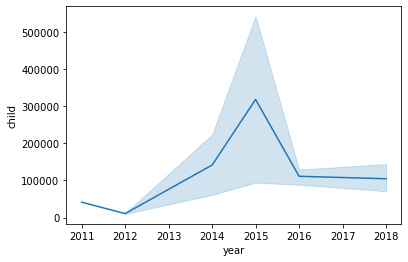

In [19]:
sns.lineplot(x='year', y= 'child', data= asthma)

<AxesSubplot:xlabel='year', ylabel='adult'>

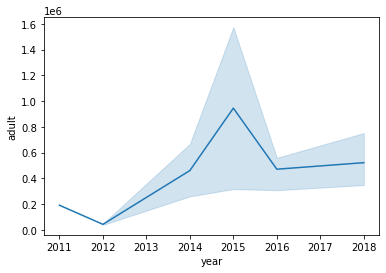

In [20]:
sns.lineplot(x='year', y= 'adult', data= asthma)